# Importing Dataset to Pandas Dataframe

In [1]:
import pandas as pd
import os
import glob
import re
from nltk.corpus import stopwords
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import arabic_reshaper
import networkx as nx

data_path = 'D:/AIU/NLP/Lab/Dana_Kailani_Ontology/Dataset/medHerb'

new_list=[]
df = pd.DataFrame(columns = ['Body']) 
all_files = glob.glob(os.path.join(data_path, "*.txt"))
df_from_each_file = (pd.read_csv(f, header=None, names=['Body']) for f in all_files)
df= pd.concat(df_from_each_file, ignore_index=True)
df

,Body
0,كمادة مفرده على جرعات مركزه أسبوعيا لشهر. في ن...
1,الحي) أرقام هواتفك النقالة أو الثابتة ( على ا...
2,الحالة العقلية والاكل الجيد المتوازن واليكم ار...
3,تدخين سجارة واحدة بعد الأكل تعادل تدخين عشر س...
4,وموطن كثير منها في الوطن العربي. فوائد الترمس ...
...,...
69,تعتبر المليسة مفيدة في حالات التشنج والمغص الم...
70,ما هو أصل الهيل: الفاكهة المجففة لنبات الهيل، ...
71,جنس نباتات تزيينية من فصيلة الخلنجيات.
72,أم ألف ورقة من الفصيلة النباتية المركبة Compos...


# Preprocessing
Remove numbers, english words, and punctuation.

In [2]:
def pre_process(df):
    #remove numbers
    df['Body'] = df['Body'].apply(lambda x: re.sub(r'\d+','', str(x)))
    #remove english words
    df['Body'] = df['Body'].apply(lambda x: re.sub(r'\s*[A-Za-z]+\b', '', str(x)))
    #remove punctuation
    df['Body'] = df['Body'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))
    
pre_process(df)

In [3]:
text = []
for i in range(len(df)):
    text.append(df.loc[i, "Body"] )
text

['كمادة مفرده على جرعات مركزه أسبوعيا لشهر في نهاية الشهر الثاني اخبرني أن زوجتين له حملتا والثالثة كان حملها في الشهر الرابع وهو الان ينعم بعائله كبيره نسال الله لهم التوفيق وهنالك الكثير من الأمثلة لتروى عن مدلولات الأحلام في الطب التجانسي لا يسعني في هذا المقال سردها يسمح بالنشر شرط ذكر المصدر للاتصال د محسن النادي جوال فلسطين  من الساعة  صباحا إلى  مساء بتوقيت مكة المكرمة تلفون ثابت  من الساعة  صباحا إلى  مساء بتوقيت مكة المكرمة أو الكتابة إلى الايميل',
 ' الحي أرقام هواتفك النقالة أو الثابتة  على الأقل رقمين',
 'الحالة العقلية والاكل الجيد المتوازن واليكم اربعة من انواع الفاكهة التي تعتبر سرا من اسرار تالق البشرة  ـ الموز يحتوي الموز على نسبة عالية من البوتاسيوم والحديد والمغنزيوم وعلى فيتامينات التي تساعد الجلد في محاربة الشيخوخة والتجاعيد افضل وقت لتناولة هو الصباح الباكر وعلى الاقل  مرات  ـ الليمون يتمتع الليمون بمحتوى عال من فيتامين مما يجعله رائعا للبشرة فالليمون يمكنه أن يساعد فيتوحيد لون البشرة والتقليل من آثار حب الشباب باﻹضافة إلى أن تناول كوب من الماء الدافئ الممزوج بعصي

# Regex to extract relations

In [4]:
match_string =[]
for sent in text:
    cond = re.findall('علاج\s*(\S+)', sent)
    if cond:
        match_string.append(cond)

string = []
for sublist in match_string:
    for val in sublist:
        string.append(val)
        
from nltk.corpus import stopwords
ar_stop_words = set(stopwords.words("arabic"))


diseases = []
for word in string:
    if word not in ar_stop_words and len(word)>=4:
        diseases.append(word)
diseases

['الطب',
 'نحتاج',
 'فيروس',
 'الديدان',
 'باقي',
 'عشبي',
 'لقتلها',
 'بدون',
 'بازهار',
 'بصورة',
 'التهاب',
 'حالات',
 'الإنتفاخ',
 'الثاليل',
 'طبيعي',
 'الروحي',
 'الجسدي',
 'الحروق',
 'الجروح',
 'طبيعي',
 'الأمراض',
 'الثاليل',
 'النحافة',
 'الكبد',
 'السمنه',
 'لارتخاء',
 'طويل',
 'الثاليل',
 'الدوالي',
 'الخاص',
 'الدوالي',
 'والأسعار',
 'انعدام',
 'يرسل',
 'يكون',
 'السرطان',
 'الثاليل',
 'الثاليل',
 'الخاص',
 'الثاليل',
 'التوتر',
 'حساسية',
 'ويمكن',
 'الثاليل',
 'بالاعشاب',
 'البروستاتا',
 'العشوائي',
 'التهابات',
 'المحافظة',
 'الرجل',
 'الرئيسية',
 'الحراري',
 'التكيس',
 'بالاعشاب',
 'الموقع',
 'العشبي',
 'للالتهابات',
 'التهابات',
 'الصداع',
 'للنزيف',
 'الحكة',
 'طارد',
 'أمراض',
 'مساعد',
 'الألم',
 'والحماية',
 'العديد',
 'العديد',
 'قشرة',
 'الإلتهابات',
 'التقرحات',
 'التقرحات',
 'العديد',
 'قصور',
 'بالقسط',
 'مشاكل',
 'مشاكل',
 'مشكلة',
 'حموضة',
 'الملاريا',
 'الأشخاص',
 'مفيد',
 'الجروح',
 'السيلانات',
 'البواسير',
 'نزيف',
 'التهابات',
 'مجموعة',
 'التهابات',
 

In [5]:
match_string =[]
for sent in text:
    cond = re.findall('نبات\s*(\S+)', sent)
    if cond:
        match_string.append(cond)

string = []
for sublist in match_string:
    for val in sublist:
        string.append(val)
        
from nltk.corpus import stopwords
ar_stop_words = set(stopwords.words("arabic"))


herbs = []
for word in string:
    if word not in ar_stop_words and len(word)>=4:
        herbs.append(word)

In [6]:
def disease_pattern(word):
    word2 = "مرض"
    word1_re = arabic_reshaper.reshape(word)
    word2_re = arabic_reshaper.reshape(word2)
    word = get_display(word1_re)
    word2 = get_display(word2_re)
    t = tuple((word2, word))
    return t

def herb_pattern(word):
    word2 = "نبات"
    word1_re = arabic_reshaper.reshape(word)
    word2_re = arabic_reshaper.reshape(word2)
    word = get_display(word1_re)
    word2 = get_display(word2_re)
    t = tuple((word2, word))
    return t

tuples1 =[]
for dis in diseases:
    tuples1.append(disease_pattern(dis))
    
tuples2 =[]
for herb in herbs:
    tuples2.append(herb_pattern(herb))

# Build Ontology Graph

C:\Users\User\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


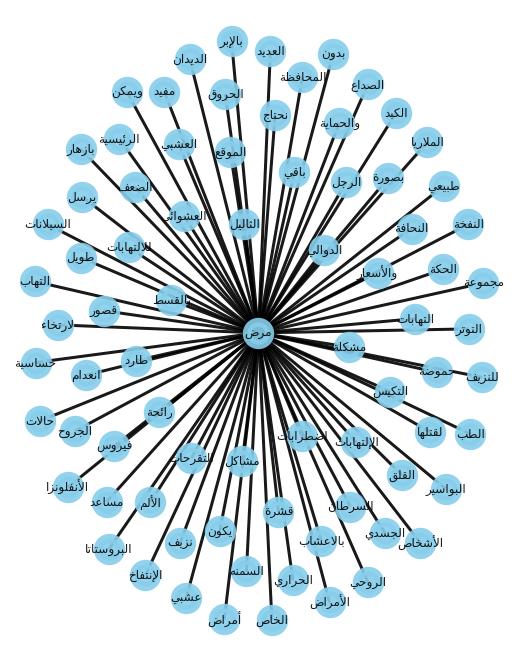

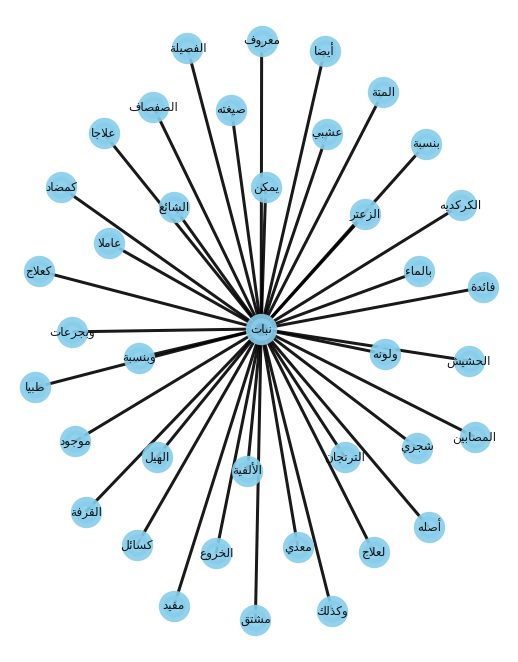

In [7]:
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import networkx as nx

    
def printGraph(tuples):
    G = nx.Graph()
    for tup in tuples:
        G.add_node(tup[0])
        G.add_node(tup[1])
        G.add_edge(tup[0], tup[1])
    pos = nx.spring_layout(G)
    plt.figure(figsize=(7, 9))
    nx.draw(G, pos, edge_color='black', width=3, linewidths=9,
            node_size=500, node_color='skyblue', alpha=0.9,
            labels={node: node for node in G.nodes()})
    plt.axis('off')
    plt.show()


printGraph(tuples1)
printGraph(tuples2)